In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
mpg = pd.read_csv("C:/Users/samsung/Desktop/datasets/mpg.csv")

In [71]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


Text(0, 0.5, 'hwy')

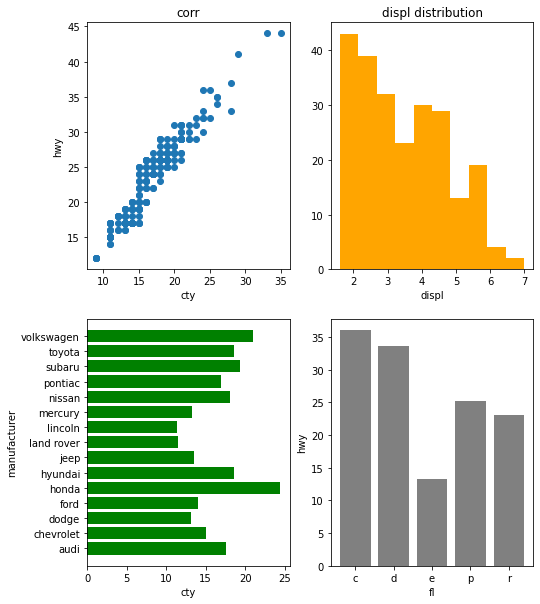

In [83]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8,10))

# 도시연비와 고속도로 연비 간 상관관계
ax[0,0].scatter(x = mpg['cty'], y = mpg['hwy'])
ax[0,0].set_title('corr')
ax[0,0].set_xlabel('cty')
ax[0,0].set_ylabel('hwy')

# 배기량 분포
ax[0,1].hist(mpg['displ'], color = 'orange')
ax[0,1].set_title('displ distribution')
ax[0,1].set_xlabel('displ')

# 제조사별 도시연비
manufacturer = mpg.groupby('manufacturer')['cty'].mean().to_frame().reset_index()
ax[1,0].barh(manufacturer['manufacturer'], manufacturer['cty'], color = 'green')
ax[1,0].set_xlabel('cty')
ax[1,0].set_ylabel('manufacturer')

# 연료별 고속도로 연비
fl = mpg.groupby('fl')['hwy'].mean().to_frame().reset_index()
ax[1,1].bar(fl['fl'], fl['hwy'], color = 'gray')
ax[1,1].set_xlabel('fl')
ax[1,1].set_ylabel('hwy')

In [84]:
titanic = pd.read_csv("C:/Users/samsung/Desktop/datasets/titanic_train.csv")

In [85]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Text(0.5, 0, 'Embarked')

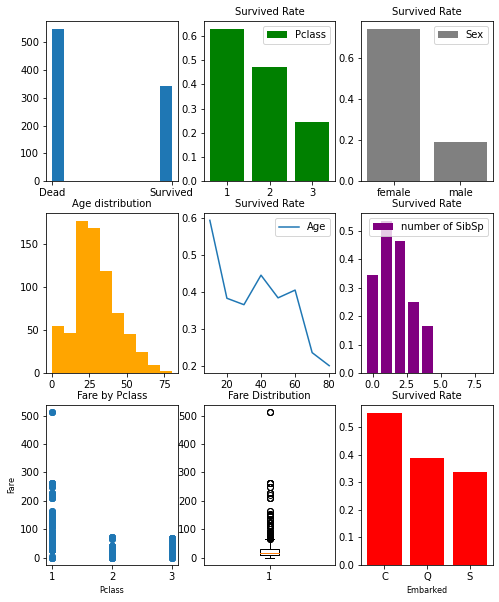

In [141]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (8,10))

# 생존율
ax[0,0].hist(titanic['Survived'])
ax[0,0].set_xticks([0,1], ['Dead', 'Survived'])

# 좌석등급에 따른 생존율
Pclass = titanic.groupby('Pclass')['Survived'].mean().to_frame().reset_index()
ax[0,1].bar(Pclass['Pclass'], Pclass['Survived'], label = 'Pclass', color = 'green')
ax[0,1].set_title('Survived Rate', fontsize = 10)
ax[0,1].legend()

# 성별에 따른 생존율
Sex = titanic.groupby('Sex')['Survived'].mean().to_frame().reset_index()
ax[0,2].bar(Sex['Sex'], Sex['Survived'], label = 'Sex', color = 'gray')
ax[0,2].set_title('Survived Rate', fontsize = 10)
ax[0,2].legend()

# 연령 분포
ax[1,0].hist(titanic['Age'], color = 'orange')
ax[1,0].set_title('Age distribution', fontsize = 10)

# 연령대별 생존율
titanic['Age_group'] = pd.cut(titanic['Age'], 8)
Age_group = titanic.groupby('Age_group')['Survived'].mean().to_frame().reset_index()
Age_group['Age_group'] = [10,20,30,40,50,60,70,80]
ax[1,1].plot(Age_group['Age_group'], Age_group['Survived'], label = 'Age')
ax[1,1].set_title('Survived Rate', fontsize = 10)
ax[1,1].legend()

# 형제자매 수에 따른 생존율
SibSp = titanic.groupby('SibSp')['Survived'].mean().to_frame().reset_index()
ax[1,2].bar(SibSp['SibSp'], SibSp['Survived'], label = 'number of SibSp',color = 'purple')
ax[1,2].set_title('Survived Rate', fontsize = 10)
ax[1,2].legend()

# 좌석등급에 따른 요금
ax[2,0].scatter(titanic['Pclass'], titanic['Fare'])
ax[2,0].set_title('Fare by Pclass', fontsize = 10)
ax[2,0].set_xlabel('Pclass', fontsize = 8)
ax[2,0].set_ylabel('Fare', fontsize = 8)

# 요금 분포
ax[2,1].boxplot(titanic['Fare'])
ax[2,1].set_title('Fare Distribution', fontsize = 10)

# 도착지별 생존율
Embarked = titanic.groupby('Embarked')['Survived'].mean().to_frame().reset_index()
ax[2,2].bar(Embarked['Embarked'], Embarked['Survived'], color = 'red')
ax[2,2].set_title('Survived Rate', fontsize = 10)
ax[2,2].set_xlabel('Embarked', fontsize = 8)